# Death Causes (2003-2017) Exploratory Analysis  

Death, the total cessation of life processes that eventually occurs in all living organisms. Only a minority of those who self-harm are suicidal. Any intentional or unintentional harm to yourself can cause more harm than initially intended, and there is the possibility that a person could unintentionally kill themselves by self-harming.
This Exploratory analysis shows death by age group, race and 3 causes of death around United States of America 

In [24]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [25]:
#importing file
acc=pd.read_csv(r'C:\Users\HP\OneDrive\Documents\Suicide death by age.csv')

In [26]:
acc

,year,region,race_or_ethnicity,sex,age_group,firearm_deaths,alcohol_related_deaths,suicide_deaths
0,2017,NYC,White Non Hispanic,F,<1,0,0,0
1,2017,ROS,White Non Hispanic,M,Total,349,1751,770
2,2017,ROS,White Non Hispanic,F,Total,36,797,205
3,2017,ROS,White Non Hispanic,M,<1,0,0,0
4,2017,ROS,White Non Hispanic,F,<1,0,0,0
...,...,...,...,...,...,...,...,...
2071,2003,NYC,Black Non Hispanic,M,45-54,0,0,0
2072,2003,NYC,Black Non Hispanic,F,45-54,0,0,0
2073,2003,NYC,Black Non Hispanic,M,35-44,1,0,0
2074,2003,NYC,Black Non Hispanic,F,35-44,0,0,1


# Data Cleaning

In [27]:
#Knowing the data, duplicates, null values, data types, Data shape)

In [28]:
#Data shape
print(acc.shape)

(2076, 8)


In [29]:
acc.isnull().sum()
#No null value

year                      0
region                    0
race_or_ethnicity         0
sex                       0
age_group                 0
firearm_deaths            0
alcohol_related_deaths    0
suicide_deaths            0
dtype: int64

In [30]:
#Deleting row of age_groups with 'Total'
acd=acc[acc.age_group != 'Total']

In [31]:
#No null value
#Checking for duplicates
acd.duplicated()
#No duplicate found

0       False
3       False
4       False
5       False
6       False
        ...  
2071    False
2072    False
2073    False
2074    False
2075    False
Length: 1814, dtype: bool

In [32]:
acd.describe()

,year,firearm_deaths,alcohol_related_deaths,suicide_deaths
count,1814.000000,1814.000000,1814.000000,1814.000000
mean,2011.077729,6.184675,34.188534,12.335722
std,4.685123,17.369593,82.630757,28.424395
min,2003.000000,0.000000,0.000000,0.000000
25%,2007.000000,0.000000,0.000000,0.000000
50%,2012.000000,0.000000,1.000000,0.000000
75%,2015.000000,2.000000,20.000000,10.000000
max,2017.000000,130.000000,618.000000,223.000000


In [33]:
acd.head(10)

,year,region,race_or_ethnicity,sex,age_group,firearm_deaths,alcohol_related_deaths,suicide_deaths
0,2017,NYC,White Non Hispanic,F,<1,0,0,0
3,2017,ROS,White Non Hispanic,M,<1,0,0,0
4,2017,ROS,White Non Hispanic,F,<1,0,0,0
5,2017,ROS,White Non Hispanic,M,85+,21,57,30
6,2017,ROS,White Non Hispanic,F,85+,1,59,1
7,2017,ROS,White Non Hispanic,M,75-84,40,195,45
8,2017,ROS,White Non Hispanic,F,75-84,2,107,7
9,2017,ROS,White Non Hispanic,M,65-74,45,410,69
10,2017,ROS,White Non Hispanic,F,65-74,4,184,25
11,2017,ROS,White Non Hispanic,M,55-64,75,537,159


In [34]:
acd.dtypes

year                       int64
region                    object
race_or_ethnicity         object
sex                       object
age_group                 object
firearm_deaths             int64
alcohol_related_deaths     int64
suicide_deaths             int64
dtype: object

In [45]:
acd['region'].unique()
#Renaming values in column region
acc['region'].replace({'NYC':'New york','ROS': 'Rest of State'}, inplace=True)

In [51]:
#Creating new column 'Total deaths'
col3=['firearm_deaths', 'alcohol_related_deaths', 'suicide_deaths']
acc['Total_deaths']=acd[col3].sum(axis=1)

In [52]:
acc

,year,region,race_or_ethnicity,sex,age_group,firearm_deaths,alcohol_related_deaths,suicide_deaths,Total_deaths
0,2017,New york,White Non Hispanic,F,<1,0,0,0,0.0
1,2017,Rest of State,White Non Hispanic,M,Total,349,1751,770,NaN
2,2017,Rest of State,White Non Hispanic,F,Total,36,797,205,NaN
3,2017,Rest of State,White Non Hispanic,M,<1,0,0,0,0.0
4,2017,Rest of State,White Non Hispanic,F,<1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
2071,2003,New york,Black Non Hispanic,M,45-54,0,0,0,0.0
2072,2003,New york,Black Non Hispanic,F,45-54,0,0,0,0.0
2073,2003,New york,Black Non Hispanic,M,35-44,1,0,0,1.0
2074,2003,New york,Black Non Hispanic,F,35-44,0,0,1,1.0


# Exploration 

In [37]:
#Stating groups
acd['year'].unique()

array([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003], dtype=int64)

In [47]:
acd['race_or_ethnicity'].unique()

array(['White Non Hispanic', 'Other Non Hispanic', 'Not Stated',
       'Hispanic', 'Black Non Hispanic'], dtype=object)

In [39]:
acd

,year,region,race_or_ethnicity,sex,age_group,firearm_deaths,alcohol_related_deaths,suicide_deaths
0,2017,NYC,White Non Hispanic,F,<1,0,0,0
3,2017,ROS,White Non Hispanic,M,<1,0,0,0
4,2017,ROS,White Non Hispanic,F,<1,0,0,0
5,2017,ROS,White Non Hispanic,M,85+,21,57,30
6,2017,ROS,White Non Hispanic,F,85+,1,59,1
...,...,...,...,...,...,...,...,...
2071,2003,NYC,Black Non Hispanic,M,45-54,0,0,0
2072,2003,NYC,Black Non Hispanic,F,45-54,0,0,0
2073,2003,NYC,Black Non Hispanic,M,35-44,1,0,0
2074,2003,NYC,Black Non Hispanic,F,35-44,0,0,1


In [48]:
#Year of most death by death causes
acd.groupby(['year']).sum().filter(items=['firearm_deaths','alcohol_related_deaths','suicide_deaths','Total_deaths']).sort_values(by=['year'],ascending=False)

,firearm_deaths,alcohol_related_deaths,suicide_deaths
year,,,
2017,752,5139,1677
2016,891,4984,1667
2015,854,4718,1668
2014,852,4567,1653
2013,827,4544,1634
2012,948,4307,1656
2011,622,4097,1617
2010,634,3873,1508
2009,587,3848,1393


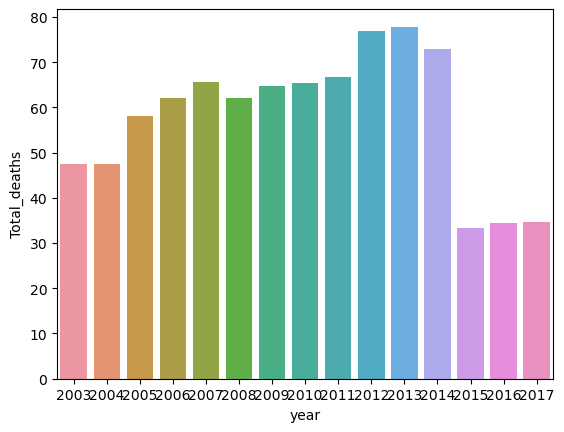

In [53]:
#Plot of year with most death
sns.barplot(x = 'year',y = 'Total_deaths',data = acc,errorbar=('se',0))
plt.show()

In [44]:
acd.dtypes

year                       int64
region                    object
race_or_ethnicity         object
sex                       object
age_group                 object
firearm_deaths             int64
alcohol_related_deaths     int64
suicide_deaths             int64
dtype: object

Highest death occured in 2013


In [54]:
#Number of people that died under firearm deaths
acc.filter(items=['firearm_deaths']).sum()

firearm_deaths    22438
dtype: int64

In [55]:
#Number of people that died under alcohol related deaths
acc.filter(items=['alcohol_related_deaths']).sum()

alcohol_related_deaths    124036
dtype: int64

In [56]:
#Number of people that died under suicide deaths
acc.filter(items=['suicide_deaths']).sum()

suicide_deaths    44754
dtype: int64

In [57]:
#Most fire arm,alcohol related and suicide deaths by gender
acc.groupby(['sex']).sum().filter(items=['firearm_deaths','alcohol_related_deaths','suicide_deaths']).sort_values(by=['sex'],ascending=False)

,firearm_deaths,alcohol_related_deaths,suicide_deaths
sex,,,
M,20360,88534,34508
F,2078,35502,10246


<Axes: xlabel='sex', ylabel='Total_deaths'>

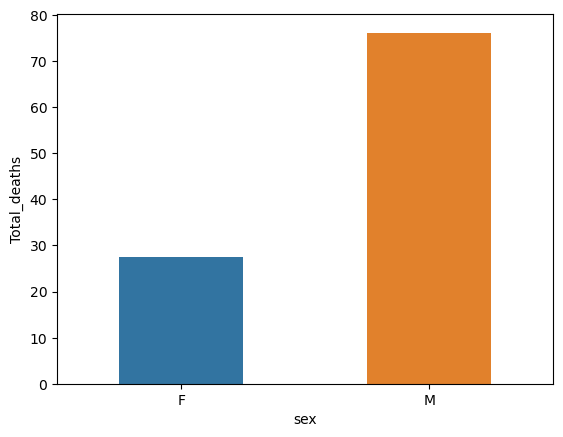

In [58]:
#plot of Gender by Total deaths
sns.barplot(x = 'sex',y = 'Total_deaths',data = acc, errorbar=('ci', 0),width=(0.5))


Increased death on men than women

In [ ]:
acd.groupby(['race_or_ethnicity']).sum().filter(items=['firearm_deaths','alcohol_related_deaths','suicide_deaths']).sort_values(by=['firearm_deaths','alcohol_related_deaths','suicide_deaths'],ascending=False)

<Axes: xlabel='race_or_ethnicity', ylabel='Total_deaths'>

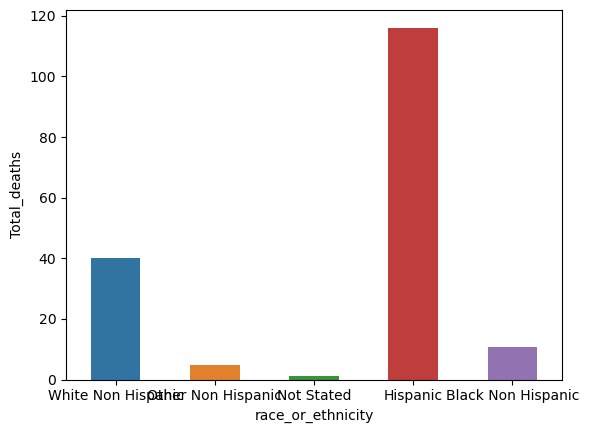

In [59]:
#plot of race by Total deaths
sns.barplot(x = 'race_or_ethnicity',y = 'Total_deaths',data = acc, errorbar=('ci', 0),width=(0.5))

Hispanic;people having connection to Spain or Spanish-speaking countries, particularly those in Latin America. It encompasses a diverse group of individuals with ties to countries where Spanish is spoken, including but not limited to Mexico, Central and South American nations, and some Caribbean countries.Based on the analysis Hispanic had the highest death count. The analysis showed that the most causes of death of Hispanic was by Deaths related to alcohol. 

In [60]:
#Age groups with the most deaths
acc.groupby(['age_group']).sum().filter(items=['firearm_deaths','alcohol_related_deaths','suicide_deaths']).sort_values(by=['firearm_deaths','alcohol_related_deaths','suicide_deaths'],ascending=False)

,firearm_deaths,alcohol_related_deaths,suicide_deaths
age_group,,,
Total,11219,62018,22377
25-34,2275,2157,3304
45-54,1730,15008,4960
35-44,1680,5583,3873
20-24,1604,464,1697
55-64,1292,18223,3655
10-19,925,116,1109
65-74,834,11487,1923
75-84,603,6755,1294


<Axes: xlabel='age_group', ylabel='Total_deaths'>

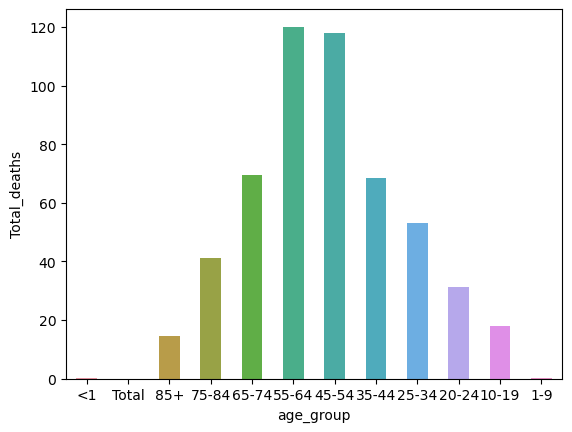

In [62]:
#plot of age groups by Total deaths
sns.barplot(x = 'age_group',y = 'Total_deaths',data = acc, errorbar=('ci', 0),width=(0.5))

<Axes: xlabel='age_group', ylabel='alcohol_related_deaths'>

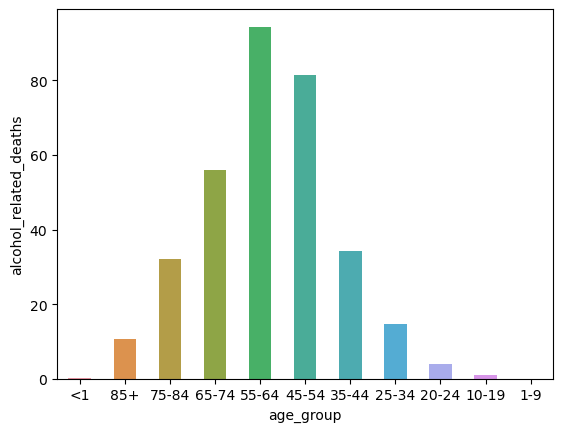

In [66]:
sns.barplot(x = 'age_group',y = 'alcohol_related_deaths',data = acd, errorbar=('ci', 0),width=(0.5))

Death occured mostly in age groups of 55-64 and mostly from alcohol use

In [49]:
acd

,year,region,race_or_ethnicity,sex,age_group,firearm_deaths,alcohol_related_deaths,suicide_deaths
0,2017,NYC,White Non Hispanic,F,<1,0,0,0
3,2017,ROS,White Non Hispanic,M,<1,0,0,0
4,2017,ROS,White Non Hispanic,F,<1,0,0,0
5,2017,ROS,White Non Hispanic,M,85+,21,57,30
6,2017,ROS,White Non Hispanic,F,85+,1,59,1
...,...,...,...,...,...,...,...,...
2071,2003,NYC,Black Non Hispanic,M,45-54,0,0,0
2072,2003,NYC,Black Non Hispanic,F,45-54,0,0,0
2073,2003,NYC,Black Non Hispanic,M,35-44,1,0,0
2074,2003,NYC,Black Non Hispanic,F,35-44,0,0,1


In [73]:
acd.reset_index(drop=True)

,year,region,race_or_ethnicity,sex,age_group,firearm_deaths,alcohol_related_deaths,suicide_deaths
0,2017,NYC,White Non Hispanic,F,<1,0,0,0
1,2017,ROS,White Non Hispanic,M,<1,0,0,0
2,2017,ROS,White Non Hispanic,F,<1,0,0,0
3,2017,ROS,White Non Hispanic,M,85+,21,57,30
4,2017,ROS,White Non Hispanic,F,85+,1,59,1
...,...,...,...,...,...,...,...,...
1809,2003,NYC,Black Non Hispanic,M,45-54,0,0,0
1810,2003,NYC,Black Non Hispanic,F,45-54,0,0,0
1811,2003,NYC,Black Non Hispanic,M,35-44,1,0,0
1812,2003,NYC,Black Non Hispanic,F,35-44,0,0,1


# CONCLUSION

From the analysis it can be seen that alcohol was the most cause of death throughout 15years. 
This evidently shows the effect of alcohol associated with excessive drinking, as it can contribute to severe health issues and fatalities. 